

## G08:   Óscar Morujo Fernández ,  Gorka Silva Ramón



# Practica 1. Aprendizaje Automático

# Parte 1. Agrupamiento o clustering

### DESCRIPCION DE LOS DATOS

 Causas de arrestos 

El conjunto contiene las cifras de arrestos por asalto,  asesinato  y  violación  por  100.000  residentes en los diferentes estados de Estados Unidos en 1973.

El objetivo es realizar agrupamientos de los estados que presenten un perfil de arrestos similar e identificar cuál ese ese perfil de arrestos y qué estados pertenecen a él; es decir, encontrar estructura en los datos.

Vamos a empezar cargando los datos:



In [183]:
import pandas as pd

df = pd.read_csv ('Datos/USArrests.csv')
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [184]:
df.shape

(50, 5)

In [185]:
#Tipos de las variables
df.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

Tenemos 5 características por cada ejemplar(fila),aunque urbanPop no la utilizaremos. Estas son:
    
    -State : nombre del estado
    -Murder : asesinatos (por 100.000)
    -Assault : asaltos (por 100.000)
    -Rape: violaciones (por 100.000)

Renombramos la columna 0 como State y eliminamos la columna UrbanPop ya que no la utilizaremos

In [186]:

df= df.rename(columns={"Unnamed: 0": "State"})


In [187]:
df = df.drop(columns="UrbanPop",axis=1)
df

,State,Murder,Assault,Rape
0,Alabama,13.2,236,21.2
1,Alaska,10.0,263,44.5
2,Arizona,8.1,294,31.0
3,Arkansas,8.8,190,19.5
4,California,9.0,276,40.6
5,Colorado,7.9,204,38.7
6,Connecticut,3.3,110,11.1
7,Delaware,5.9,238,15.8
8,Florida,15.4,335,31.9
9,Georgia,17.4,211,25.8


Con los historigramas podemos ver que los valores de las frecuencias para murder, assault y rape son muy parecidas hasta la mitad de los historigramas.
Murder y assault son tambien algo parecidas a partir de la mitad mientras que en rape toma valores mas bajos. Esto nos dice que probablemente tengan una correlación fuerte.
Seguimos analizando los datos y sacar conclusiones:

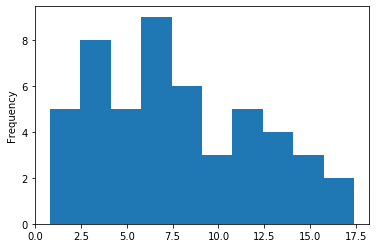

In [164]:
df['Murder'].plot.hist()

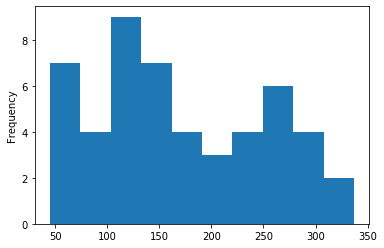

In [165]:
df['Assault'].plot.hist()

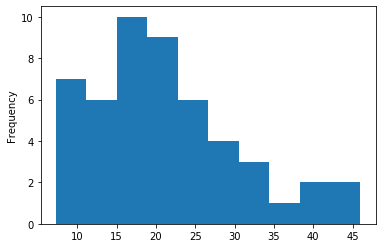

In [166]:
df['Rape'].plot.hist()

### TABLA DE ESTADÍSTICOS DESCRIPTIVOS DE LAS VARIABLES

Represemtamos los datos de la tabla de estadísticos descriptivos y con ayuda de barplot lo representamos visualmente:

In [188]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from numpy import random, float, array
import numpy as np
import seaborn as sns


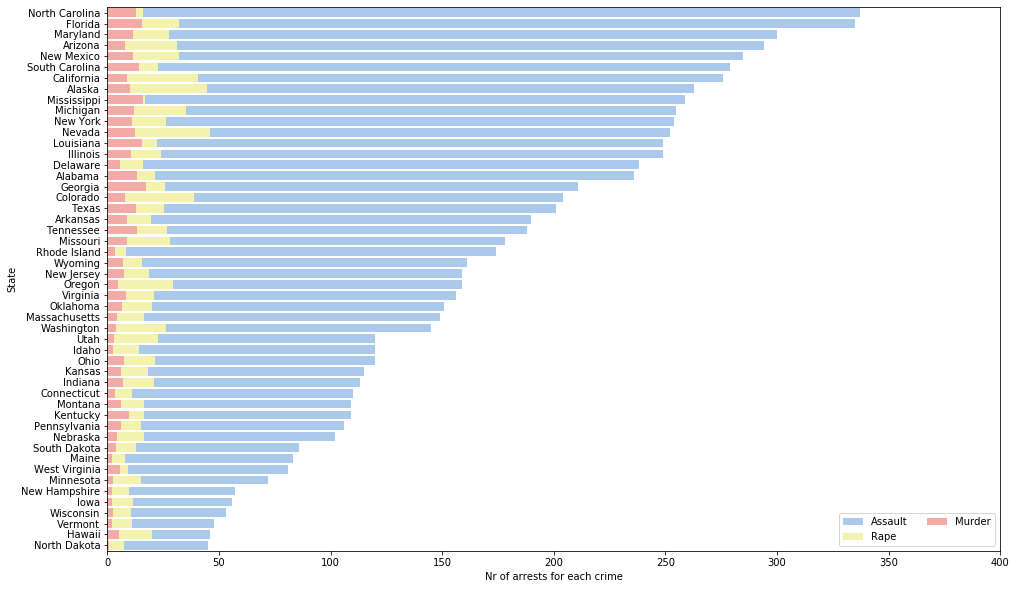

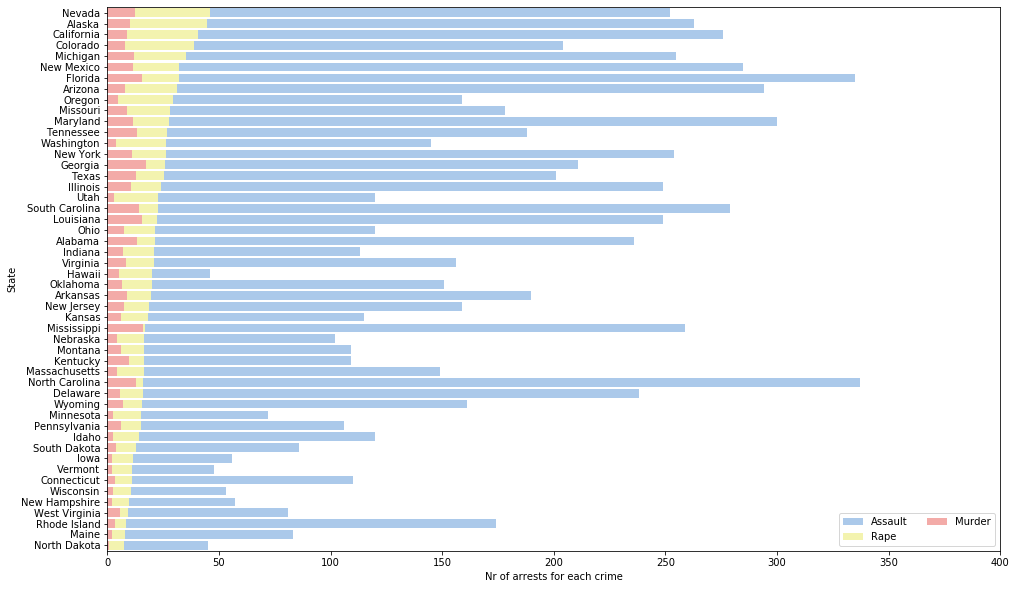

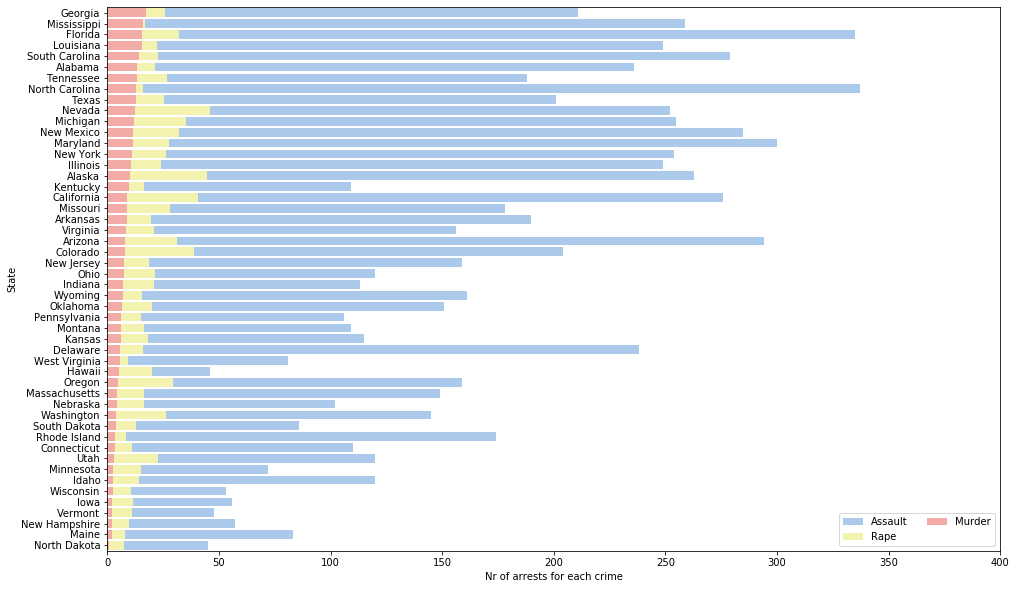

In [168]:

for s in ["Assault","Rape","Murder"]:
    f, ax = plt.subplots(figsize=(16, 10))

    stats = df.sort_values(s, ascending=False)

    sns.set_color_codes("pastel")


    sns.barplot(x="Assault", y="State", data=stats,
                label="Assault", color="b")

    sns.barplot(x="Rape", y="State", data=stats,
                label="Rape", color="y")

    sns.barplot(x="Murder", y="State", data=stats,
                label="Murder", color="r")

    # Add a legend and informative axis label
    ax.legend(ncol=2, loc="lower right", frameon=True)
    ax.set(xlim=(0, 400), ylabel="State",
           xlabel="Nr of arrests for each crime");

In [169]:
df.describe()

,Murder,Assault,Rape
count,50.00000,50.000000,50.000000
mean,7.78800,170.760000,21.232000
std,4.35551,83.337661,9.366385
min,0.80000,45.000000,7.300000
25%,4.07500,109.000000,15.075000
50%,7.25000,159.000000,20.100000
75%,11.25000,249.000000,26.175000
max,17.40000,337.000000,46.000000



Como podemos ver la cantidad de asesinatos es bastante menor en general, la tasa de asesinatos media es 7.78, el mínimo 0.80 y el máximo 17.40.

También observamos comparando valores máximos,mínimos y medias que el número de asaltos se da en mayor cantidad que en asesinatos y que violaciones.

Las violaciones son algo más frecuentes respecto a la cantidad de asesinatos, pero bastante menos frecuente que la cantidad de assaltos.

Si nos fijamos en el error medio(desviación típica), vemos que Rape y Murder tienen un valor bastante bajo, mientras que Assault tiene un valor más alto, lo que quiere decir que varían bastante de la recta de regresión y tienen valores más variados.

Con los percentiles podemos ver:

    -El 25% de la tasa de asesinatos está por debajo de 4.35, mientras que el 75 % esta por debajo de 11.25.
    -El 25% de la tasa de asaltos está por debajo de 109, mientras que el 75 % esta por debajo de 249.
    -El 25% de la tasa de violaciones está por debajo de 15.07, mientras que el 75 % esta por debajo de 26.157.

Además el 50% de todas las características estan por debajo de su media

,Murder,Assault,Rape
Murder,1.000000,0.801873,0.563579
Assault,0.801873,1.000000,0.665241
Rape,0.563579,0.665241,1.000000


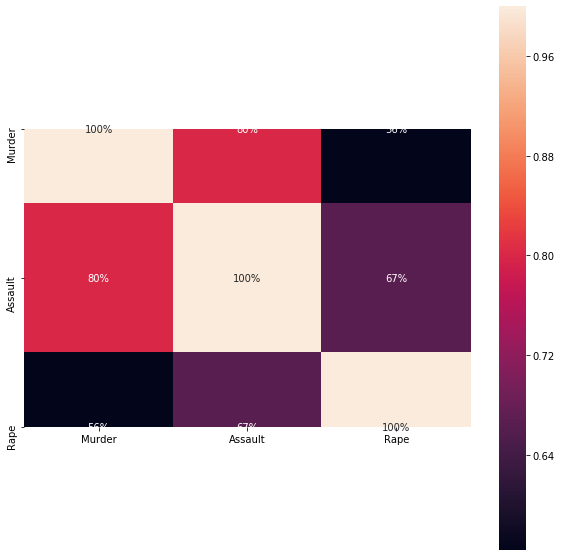

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,10))  
sns.heatmap(df.corr(),square=True,annot=True, fmt='.0%')
df.corr()

### Conclusiones sobre las variables
Observando los valores de la correlación entre las variables vemos que hay una relación lineal entre asaltos y asesinatos bastante significativa. Con la variable de asaltos observamos que los estados se pueden agrupar en 2 tipos: los que tienen un número entre medio y pequeño que es lo que sigue la normalidad de las otras variables, y el grupo de mayor número de asaltos, entre 250-300, que es donde se agrupan bastantes valores, aunque menos que en el primer grupo.

### Re-escalado de las variables
Es necesario re-escalar las variables para realizar una comparación entre sí, ya que puede ocurrir que una variable tome valores mucho mas grandes que otras e influya mucho a la distancia entre puntos a la hora de intentar encontrar estructura en los datos.


In [189]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.datasets.samples_generator import make_blobs
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [190]:
from sklearn.preprocessing import StandardScaler

# Normalizamos los datos para que estén centrados en 0 y con varianza 1
scaler = StandardScaler()
aux = df.to_numpy()

aux = aux[:, 1:4] #para no seleccionar las variables no numéricas
X = scaler.fit_transform(aux)
X

array([[ 1.25517927,  0.79078716, -0.00345116],
       [ 0.51301858,  1.11805959,  2.50942392],
       [ 0.07236067,  1.49381682,  1.05346626],
       [ 0.23470832,  0.23321191, -0.18679398],
       [ 0.28109336,  1.2756352 ,  2.08881393],
       [ 0.02597562,  0.40290872,  1.88390137],
       [-1.04088037, -0.73648418, -1.09272319],
       [-0.43787481,  0.81502956, -0.58583422],
       [ 1.76541475,  1.99078607,  1.1505301 ],
       [ 2.22926518,  0.48775713,  0.49265293],
       [-0.57702994, -1.51224105, -0.11129987],
       [-1.20322802, -0.61527217, -0.75839217],
       [ 0.60578867,  0.94836277,  0.29852525],
       [-0.13637203, -0.70012057, -0.0250209 ],
       [-1.29599811, -1.39102904, -1.07115345],
       [-0.41468229, -0.67587817, -0.34856705],
       [ 0.44344101, -0.74860538, -0.53190987],
       [ 1.76541475,  0.94836277,  0.10439756],
       [-1.31919063, -1.06375661, -1.44862395],
       [ 0.81452136,  1.56654403,  0.70835037],
       [-0.78576263, -0.26375734, -0.531

Una vez tenemos escalados los datos estamos preparados para realizar el clustering.

# Clustering 

In [191]:
   """ Función auxiliar para pintar los puntos de los clusters y, optativamente, sus centros.
    :param X: array de puntos de dos dimensiones (array de array de enteros)
    :param labels: cluster al que pertenece cada punto (array de enteros)
    :param centers: coordenadas de los centroides de los clusters (array de array de enteros)
    """
def plot_clusters(X, labels=None, centers=None):
    colors = ['r','g','b','c','y','k','m',]
    fig = plt.figure(figsize=(8,8))
    
    # Los dos primeros parámetros de la función scatter son las coordenadas de los puntos,
    # el parámetro 'c' indica la clase asignada de cada punto, y 'cmap' se usa para colorear 
    # las distintas clases
    plt.scatter(X[:,0], X[:,1], c=labels, cmap=ListedColormap(colors))
    
    # Pintar los centroides de los clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], marker="x", color='k', s=150, linewidths = 5, zorder=10)
        
    plt.show()

## Clustering asesinato-violaciones:

Vamos a usar el algortimo k-means y a cacular el índice de Davies-Bouldin para ver como de compactos y separados quedan los clusters y seleccionar en numero de cluster que lo minimice. Usaremos las variables murder y rape( ya que murder estaba muy correlacionada con assault).

In [225]:
X_AUX = np.delete(X, 1, 1)
murderRape = X_AUX
murderRape

array([[ 1.25517927, -0.00345116],
       [ 0.51301858,  2.50942392],
       [ 0.07236067,  1.05346626],
       [ 0.23470832, -0.18679398],
       [ 0.28109336,  2.08881393],
       [ 0.02597562,  1.88390137],
       [-1.04088037, -1.09272319],
       [-0.43787481, -0.58583422],
       [ 1.76541475,  1.1505301 ],
       [ 2.22926518,  0.49265293],
       [-0.57702994, -0.11129987],
       [-1.20322802, -0.75839217],
       [ 0.60578867,  0.29852525],
       [-0.13637203, -0.0250209 ],
       [-1.29599811, -1.07115345],
       [-0.41468229, -0.34856705],
       [ 0.44344101, -0.53190987],
       [ 1.76541475,  0.10439756],
       [-1.31919063, -1.44862395],
       [ 0.81452136,  0.70835037],
       [-0.78576263, -0.53190987],
       [ 1.00006153,  1.49564599],
       [-1.1800355 , -0.68289807],
       [ 1.9277624 , -0.44563089],
       [ 0.28109336,  0.75148985],
       [-0.41468229, -0.521125  ],
       [-0.80895515, -0.51034012],
       [ 1.02325405,  2.671197  ],
       [-1.31919063,

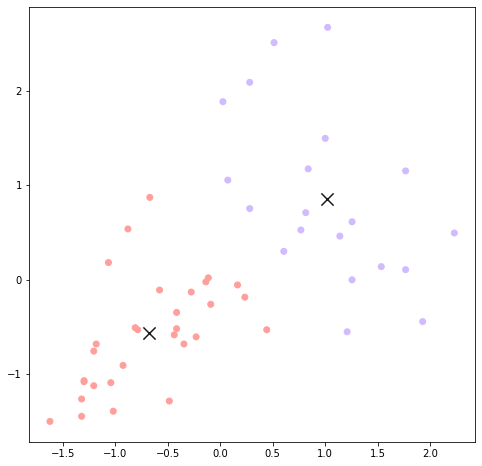

0.7170598694726752


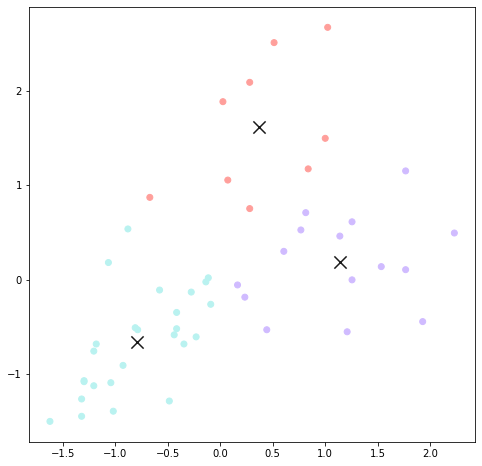

1.0208963150868673


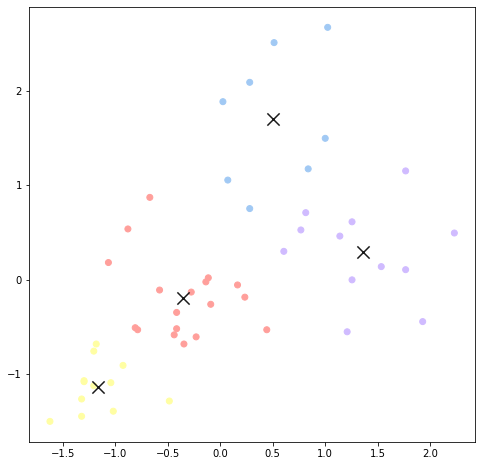

0.9290533147204946


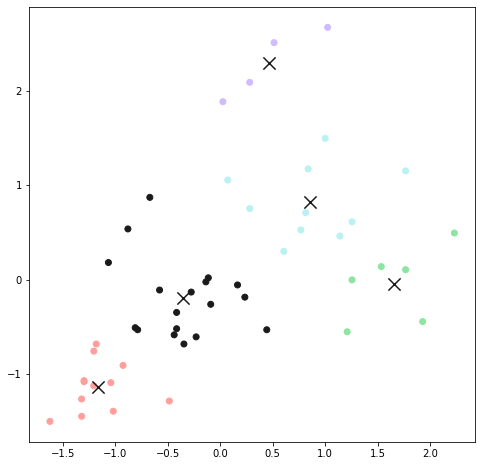

0.987059508465887


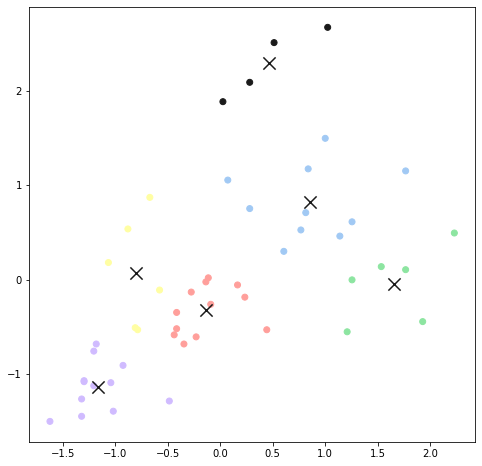

1.1740474031456076


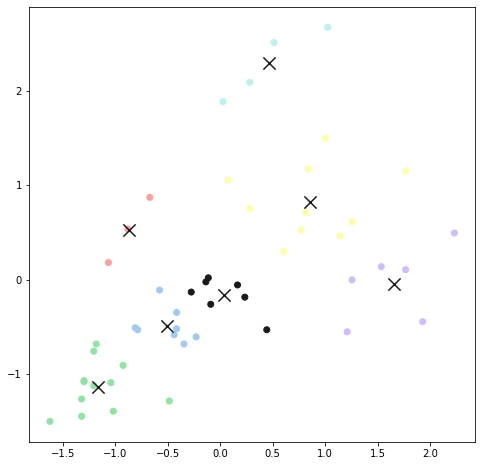

1.1575919158855765


In [215]:

K_MAX = 8
davies_boulding = np.zeros(K_MAX-2)
for k in range(2, K_MAX): 
    km = KMeans(init='random', n_clusters=k, random_state=333)
    km.fit(murderRape)
    plot_clusters(murderRape, km.labels_, km.cluster_centers_)
    
    davies_boulding[k-2] = davies_bouldin_score(X, km.labels_) 
    print(davies_boulding[k-2])

Text(0.5, 1.0, 'Valor de Davies Boulding para diferentes k')

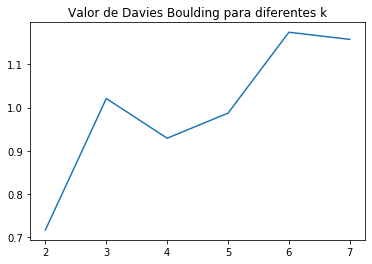

In [216]:
plt.plot(range(2, K_MAX), davies_boulding)
plt.title('Valor de Davies Boulding para diferentes k')

Vamos a analizar los datos usando 2 clusters, ya que es el valor para el cual obtenemos el mínimo de Davies Boulding

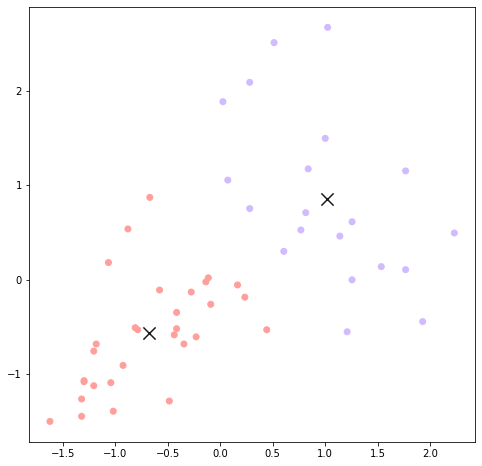

In [226]:
# Crear una instancia del agrupador k-means
km = KMeans(init='random', n_clusters=2, random_state=333)

# Agrupar los puntos en clusters
km.fit(murderRape)

# Podemos consultar el cluster asignado a cada punto y el centro de cada cluster
labels = km.labels_
centers = km.cluster_centers_

plot_clusters(murderRape, labels, centers)

Una vez tenemos los centros procedemos a asignar cada estado al cluster que pertenece:

In [228]:
df_scaled = pd.DataFrame(data=X, columns=['Murder','Assault','Rape'])
df_scaled = df_scaled.assign(cluster=pd.Series(data=km.labels_))
df1 = df.assign(cluster=pd.Series(data=km.labels_))
df1.head()


,State,Murder,Assault,Rape,cluster
0,Alabama,13.2,236,21.2,1
1,Alaska,10.0,263,44.5,1
2,Arizona,8.1,294,31.0,1
3,Arkansas,8.8,190,19.5,0
4,California,9.0,276,40.6,1


In [235]:
df1.groupby(["cluster"]).describe()

Murder                                                     Assault  \
         count    mean       std  min     25%    50%     75%   max   count   
cluster                                                                      
0         30.0   4.870  2.304291  0.8   2.825   4.65   6.525   9.7    30.0   
1         20.0  12.165  2.684904  7.9  10.300  12.15  13.500  17.4    20.0   

                     ...                Rape                             \
               mean  ...    75%    max count       mean       std   min   
cluster              ...                                                  
0        114.433333  ...  150.5  238.0  30.0  15.943333  5.460370   7.3   
1        255.250000  ...  280.5  337.0  20.0  29.165000  8.386473  16.1   

                                      
            25%    50%     75%   max  
cluster                               
0        11.225  16.05  19.875  29.3  
1        23.625  27.35  32.850  46.0  

[2 rows x 24 columns]

In [238]:
df1.groupby(["cluster"])["Assault"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,30.0,114.433333,47.48189,45.0,81.50,111.5,150.5,238.0
1,20.0,255.250000,44.11692,178.0,229.75,254.5,280.5,337.0


Analizamos:
    - La media de murder del cluster 0 es 4.8, y el máximo es 9.7, mientras que en el cluster 1 la media es 12.165 que es bastante mayor y el mínimo es 7.9 ( que es mayor al 75% de los del cluster 0)
    -La media de assault del cluster 0 es 114.433 , el máximo es 238 y el mínimo 45,mientras que en el cluster 1 la media es 255.25 , el máximo es 337 y el mínimo 178. El máximo del cluster 0 tiene un valor que esta cerca del 25% del cluster 1.
    -La media de rape es menor en la clase 0 que en la clase 1. El 75% de la clase 0 esta por debajo de 19.875, mientras que e mientras que el minimo de la clase 1 es 16.1

C:\Users\oscar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\oscar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


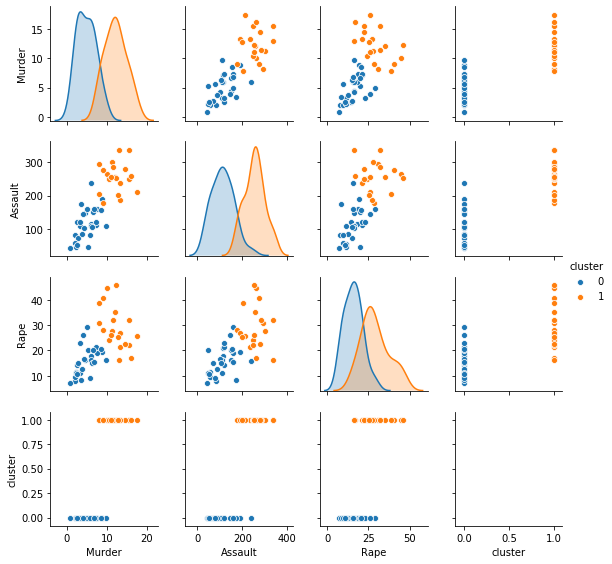

In [224]:
sns.pairplot(df1,hue='cluster',height=2)

Las conclusiones que podemos sacar de estos dos grupos son:

    -El grupo 0 no tiene un número elevado ni de asesinatos ni de asaltos mientras que el 1 contiene aquellos estados que que tienen un gran numero de asesinatos y asaltos. De momento podemos decir que el grupo 0 es menos conflictivo que el grupo 1.
    -El grupo 0 además tiene la mayoria de puntos(respecto a rape) por debajo de 25, mientras que el grupo 1 tiende a tener más violaciones.

Vemos que aunque el grupo 0 sea menos númeroso en cuanto asesinatos y asaltos, los dos grupos constan de estados con un numero de violaciones parecidas, aunque claramente se puede ver que el grupo 0 tiende a ser menor igualmente.
Podemos ver tambíen las funciones de densidad de la diagonal, como vemos para murder y para assault en general se diferencian bien, aunque para rape tienen una mayor interseccion en puntos elevados, por lo que encierran puntos parecidos en diferentes clases como habiamos dicho.
